In [1]:
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
import seaborn as  sns
import cv2
import cartopy.feature as cf
import xarray as xr
import  netCDF4 as ncc
import cartopy as cct
import statistics as st
from scipy.stats import norm
from scipy.io import netcdf as ncf
from mpl_toolkits.basemap import Basemap as bsm
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

C:\Users\gasan\anaconda3\lib\site-packages\ecmwflibs\__init__.py:83: UserWarning: DLL load failed while importing _ecmwflibs: The specified procedure could not be found.
  warnings.warn(str(e))
C:\Users\gasan\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


# Question 1.

In [2]:
data1={'Var':np.random.randn(1000)} #generate data of size 1000
df1=pd.DataFrame(data1)
df1.head()

,Var
0,0.091668
1,-0.211039
2,0.699252
3,0.054834
4,-0.869569


# Show the statistics of the generated data

In [3]:
df1.describe()

,Var
count,1000.000000
mean,0.026560
std,1.027744
min,-3.193175
25%,-0.678968
50%,0.024035
75%,0.703521
max,3.562098


# Computation of statistical measures

In [4]:
variance=df1['Var'].var()
mean=df1['Var'].mean()
std=df1['Var'].std()
mode=st.mode(df1['Var'].values)
Q1,Q3=np.percentile(df1['Var'].values,[25,75])
IQR=Q3-Q1
print('>>The varince is: %s'%variance)
print('\n\n>>The standard deviation is:  %s'%std)
print('\n\n>>The mean is:  %s'%mean)
print('\n\n>>The mode is: %s'%mode)
print('\n\n>>The Interquantile range is: %s'%IQR)

>>The varince is: 1.056258489450746


>>The standard deviation is:  1.0277443697003386


>>The mean is:  0.026560225150890255


>>The mode is: 0.09166787972872145


>>The Interquantile range is: 1.3824881227224992


# Plotting of histogram and box plot

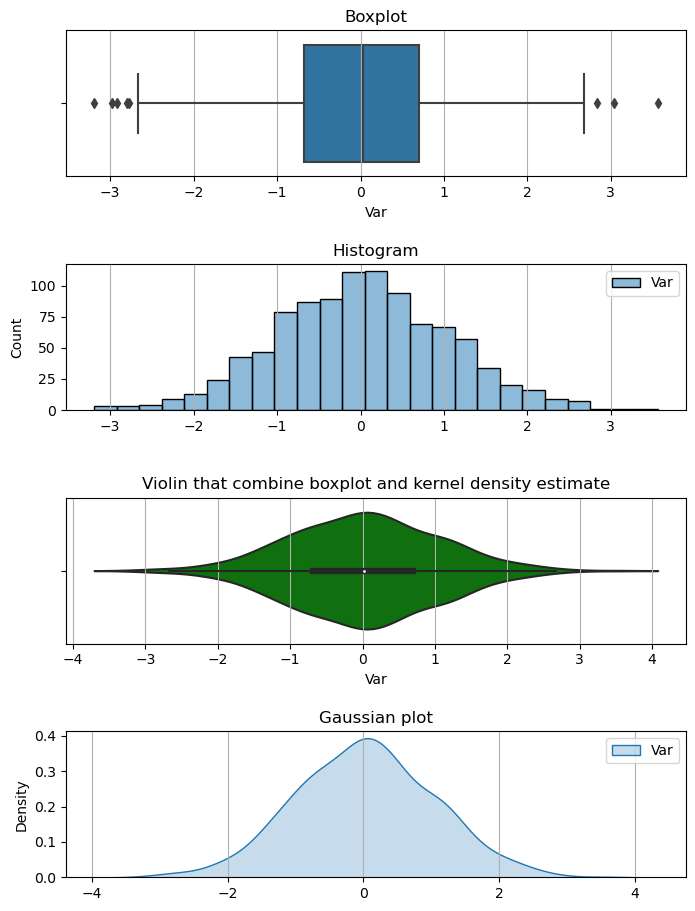

In [5]:
plt.figure(figsize=(8,11))
plt.subplots_adjust(wspace=0.5,hspace=0.6)
plt.subplot(4,1,1)

sns.boxplot(x=df1['Var'])
plt.grid(axis='x')
plt.title('Boxplot')
plt.subplot(4,1,2)
plt.grid(axis='x')
sns.histplot(data=df1)
plt.title('Histogram')
plt.subplot(4,1,3)
sns.violinplot(x=df1['Var'],split=True,color='g')
plt.grid(axis='x')
plt.title('Violin that combine boxplot and kernel density estimate')
plt.subplot(4,1,4)
sns.kdeplot(data=df1,fill=True,common_grid=True,levels=[1,2,3])
plt.grid(axis='x')
plt.title('Gaussian plot')
plt.show()

# Question 2

In [8]:
dataset2=pd.read_csv('sampledata.txt',header=None)# Read the data

In [10]:
dataset2.columns=['Temp']  #Name the column
dataset2.head(10)   #display first 10 elements

,Temp
0,27.7418
1,28.8704
2,27.1007
3,27.0132
4,27.3996
5,28.4364
6,28.6897
7,26.0483
8,27.5327
9,28.1471


In [11]:
dataset2.shape #check the shape

(37, 1)

# Describe the statistics

In [12]:
dataset2.describe()

,Temp
count,37.000000
mean,27.773789
std,0.768900
min,26.048300
25%,27.326700
50%,27.697700
75%,28.435600
max,29.287800


# Computational of statistical measure in the datasample.txt file

In [13]:
variance=dataset2['Temp'].var()
mean=dataset2['Temp'].mean()
std=dataset2['Temp'].std()
mode=st.mode(dataset2['Temp'].values)
Q1,Q3=np.percentile(dataset2['Temp'].values,[25,75])
IQR=Q3-Q1
print('>>The varince in temperature is: %s'%variance)
print('\n\n>>The standard deviation in temperature is:  %s'%std)
print('\n\n>>The mean of temperature is:  %s'%mean)
print('\n\n>>The most frequent(mode) temperature is: %s'%mode)
print('\n\n>>The Interquantile range in temperature is: %s'%IQR)

>>The varince in temperature is: 0.5912068848798798


>>The standard deviation in temperature is:  0.7688997885809826


>>The mean of temperature is:  27.77378918918919


>>The most frequent(mode) temperature is: 27.7418


>>The Interquantile range in temperature is: 1.108900000000002


# Plotting of the data

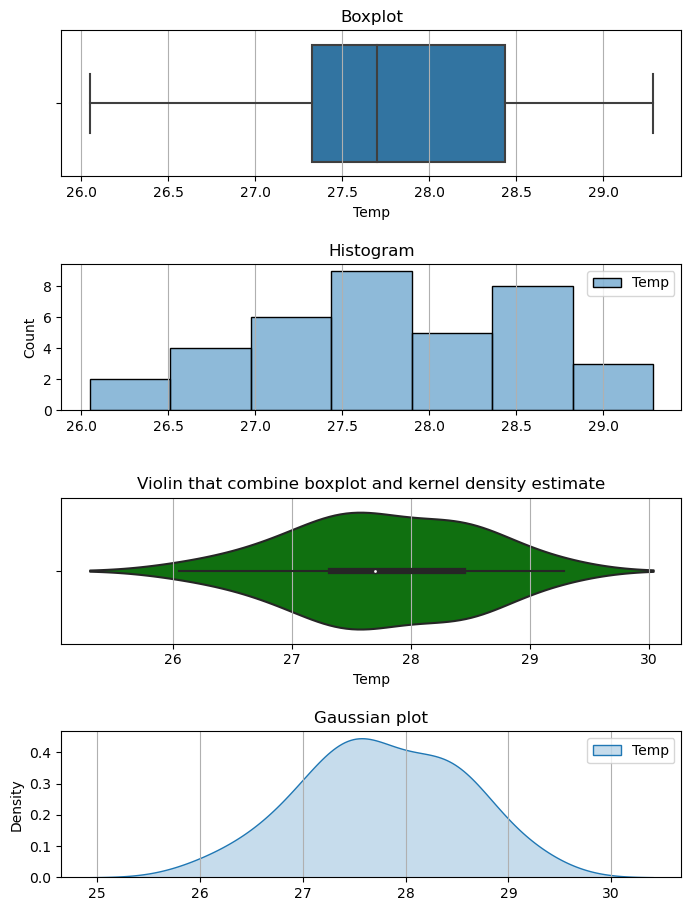

In [14]:
plt.figure(figsize=(8,11))
plt.subplots_adjust(wspace=0.5,hspace=0.6)
plt.subplot(4,1,1)

sns.boxplot(x=dataset2['Temp'])
plt.grid(axis='x')
plt.title('Boxplot')
plt.subplot(4,1,2)
plt.grid(axis='x')
sns.histplot(data=dataset2)
plt.title('Histogram')
plt.subplot(4,1,3)
sns.violinplot(x=dataset2['Temp'],split=True,color='g')
plt.grid(axis='x')
plt.title('Violin that combine boxplot and kernel density estimate')
plt.subplot(4,1,4)
sns.kdeplot(data=dataset2,fill=True,common_grid=True,levels=[1,2,3])
plt.grid(axis='x')
plt.title('Gaussian plot')
plt.show()

# Question 3. Process netCDF file 

In [15]:
dataset=xr.open_dataset('era5_tas_1959_2021_25deg.nc')

C:\Users\gasan\anaconda3\lib\site-packages\ecmwflibs\__init__.py:83: UserWarning: DLL load failed while importing _ecmwflibs: The specified procedure could not be found.
  warnings.warn(str(e))
C:\Users\gasan\anaconda3\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\gasan\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [16]:
dataset

<xarray.Dataset>
Dimensions:  (time: 756, lon: 144, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2021-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    t2m      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jul 07 12:31:21 2022: cdo remapbil,r144x73 era5_tas_195...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

# Yearly Mean computation 

In [17]:
data_mean=(dataset
 .groupby('time.year') #If it is monthly, I can use time.month instead of being time.Year
 .reduce(np.mean))

In [18]:
data_mean

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 73, year: 63)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * year     (year) int64 1959 1960 1961 1962 1963 ... 2017 2018 2019 2020 2021
Data variables:
    t2m      (year, lat, lon) float32 227.6 227.6 227.6 ... 259.8 259.8 259.8

# Plot of the Yearly mean temperature

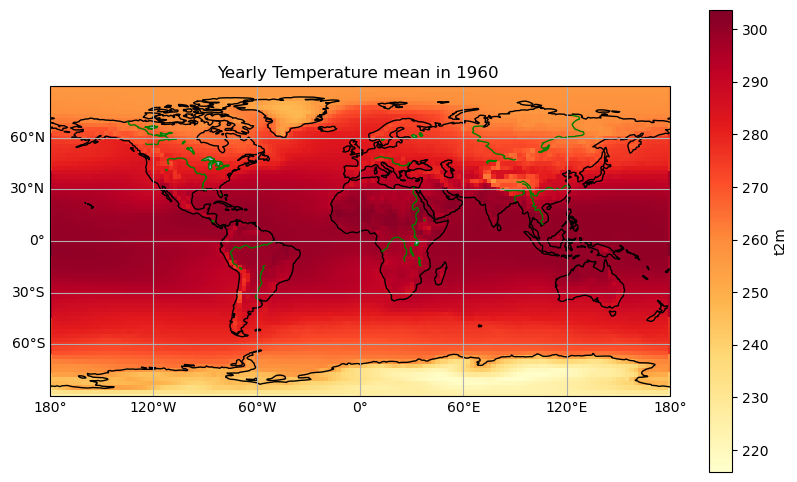

In [21]:
plt.figure(figsize=(10,6))

    
data_mean_i=data_mean['t2m'][1,:,:]
#    


ax1=plt.axes(frameon=True,projection=ccrs.PlateCarree())
cs=ax1.contourf(data_mean_i['lon'], dataset['lat'], data_mean_i,
        transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')

data_mean_i.plot(ax=ax1,cmap='YlOrRd',transform=ccrs.PlateCarree())


ax1.coastlines()
gl=ax1.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False



ax1.add_feature(cf.LAND)

ax1.add_feature(cf.OCEAN)
ax1.add_feature(cf.LAKES,edgecolor='g')
ax1.add_feature(cf.RIVERS,edgecolor='g')

plt.title('Yearly Temperature mean in %s '%int(data_mean_i['year']))

plt.savefig('Myimage_year_mean.pdf',dpi=300)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#     print(i)
# Add colorbar
# cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')
plt.show()


# Compute the variance

In [22]:
data_var=(dataset
 .groupby('time.year')
 .reduce(np.var))

# Plot of the variance

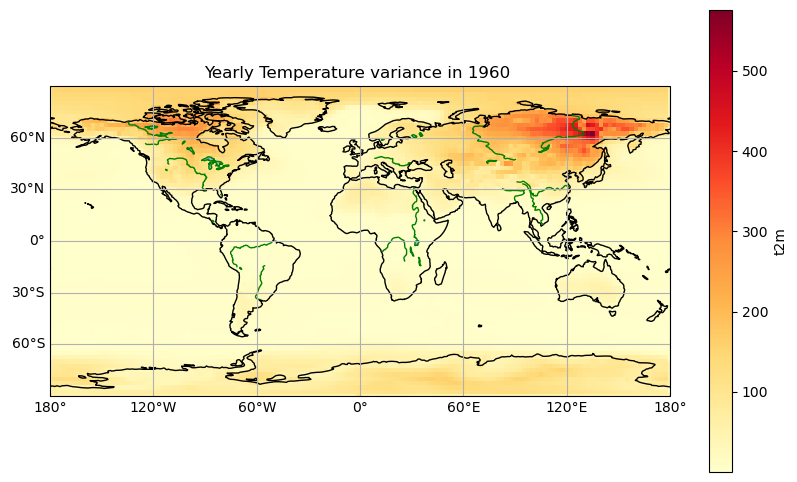

In [25]:
data_var=(dataset
 .groupby('time.year')
 .reduce(np.var))

plt.figure(figsize=(10,6))

    
data_var_i=data_var['t2m'][1,:,:]



ax1=plt.axes(frameon=True,projection=ccrs.PlateCarree())

cs=ax1.contourf(data_var_i['lon'], dataset['lat'], data_var_i,
        transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')

data_var_i.plot(ax=ax1,cmap='YlOrRd',transform=ccrs.PlateCarree())


ax1.coastlines()
gl=ax1.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False



ax1.add_feature(cf.LAND)

ax1.add_feature(cf.OCEAN)
ax1.add_feature(cf.LAKES,edgecolor='g')
ax1.add_feature(cf.RIVERS,edgecolor='g')

plt.title('Yearly Temperature variance in %s '%int(data_var_i['year']))

plt.savefig('Myimage_year_var.pdf',dpi=300)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#     print(i)
# Add colorbar
# cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')
plt.show()


In [2]:
from metpy.plots import USCOUNTIES

C:\Users\gasan\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Compute the standard deviation

In [26]:
data_std_year=(dataset
 .groupby('time.year')
 .reduce(np.std))

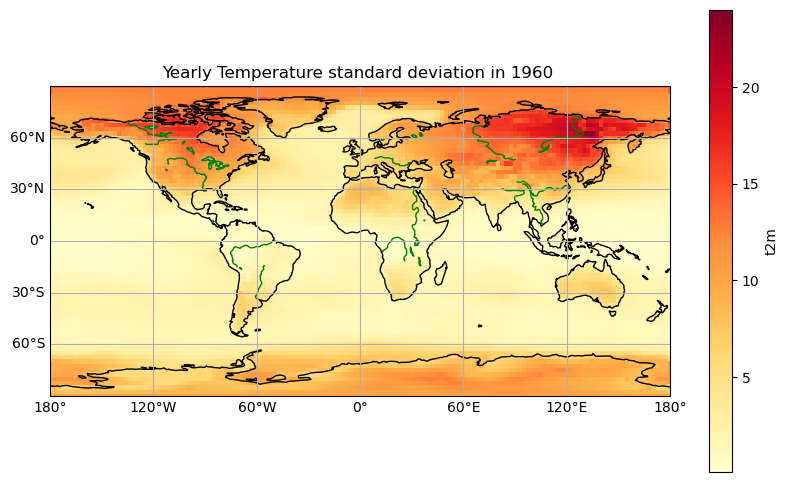

In [27]:
data_std_year=(dataset
 .groupby('time.year')
 .reduce(np.std))



plt.figure(figsize=(10,6))

    
data_std_i=data_std_year['t2m'][1,:,:]  #Here index can be changed



ax1=plt.axes(frameon=True,projection=ccrs.PlateCarree())

cs=ax1.contourf(data_std_i['lon'], dataset['lat'], data_std_i,
        transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')

data_std_i.plot(ax=ax1,cmap='YlOrRd',transform=ccrs.PlateCarree())


ax1.coastlines()
gl=ax1.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False



ax1.add_feature(cf.LAND)

ax1.add_feature(cf.OCEAN)
ax1.add_feature(cf.LAKES,edgecolor='g')
ax1.add_feature(cf.RIVERS,edgecolor='g')

plt.title('Yearly Temperature standard deviation in %s '%int(data_std_i['year']))

plt.savefig('Myimage_year_std.pdf',dpi=300)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#     print(i)
# Add colorbar
# cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')
plt.show()


# Let compute the anomaly at the start

In [28]:
year_data_time=dataset.groupby('time.year')

In [29]:
data_anomaly=year_data_time-data_mean

In [30]:
data_anomaly.dims

Frozen({'time': 756, 'lon': 144, 'lat': 73})

In [31]:
data_anomaly

<xarray.Dataset>
Dimensions:  (time: 756, lon: 144, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2021-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
    year     (time) int64 1959 1959 1959 1959 1959 ... 2021 2021 2021 2021 2021
Data variables:
    t2m      (time, lat, lon) float32 17.14 17.14 17.14 ... -9.898 -9.898 -9.898

# Anomaly plot at the start of an year

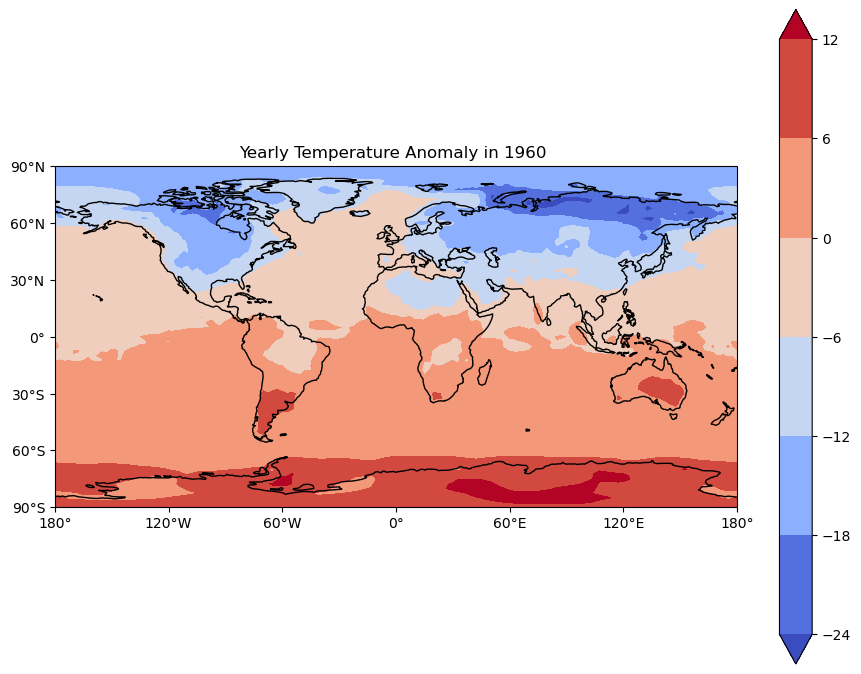

In [32]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data

data_anomaly_i=data_anomaly['t2m'][13,:,:]
# print(data_anomaly_i)
# plt.subplot(12,3,i+1)
data, lons = add_cyclic_point(data_anomaly_i, coord=data_anomaly_i['lon'])
# print('jjjj=',data['lat'])

cs=ax.contourf(lons, data_anomaly['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())

lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()

ax.set_title('Yearly Temperature Anomaly in %s '%int(data_anomaly_i['year']))

ax.yaxis.set_major_formatter(lat_formatter)
# jj+=1
cbar = plt.colorbar(cs)